In [ ]:
import os
import sys
import scipy
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scipy.io as sio
import anndata as ad
import matplotlib.pyplot as plt

os.chdir("/data/wuqinhua/scPhase/Lung")

/home/wuqinhua/anaconda3/envs/phase/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/wuqinhua/anaconda3/envs/phase/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)
/home/wuqinhua/anaconda3/envs/phase/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/home/wuqinhua/anaconda3/envs/phase/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_mtx from `anndata` is deprecated. Import anndata.io.read_mtx instead.
  warnings.warn(msg, FutureWarning)
/home/wuqinhua/anaconda3/envs/phase/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: 

# 1. Cell-level

In [ ]:
adata = sc.read_h5ad("./ensemble_adata_with_attention.h5ad")
adata

/home/wuqinhua/anaconda3/envs/phase/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 460121 × 5000
    obs: 'sample_id', 'uicc_stage', 'ever_smoker', 'age', 'donor_id', 'origin', 'dataset', 'celltype', 'cell_type_predicted', 'doublet_status', 'leiden', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'ann_coarse', 'cell_type_tumor', 'tumor_stage', 'TP53_mutation', 'ALK_mutation', 'BRAF_mutation', 'ERBB2_mutation', 'KRAS_mutation', 'ROS_mutation', 'origin_fine', 'study', 'platform', 'cell_type_major', 'suspension_type', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'tissue_type', 'EGFR_mutation', 'cell_type', 'assay', 'phenotype', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'attention_weight_mean', 'attention_weight_std'
    var: 'is_highly_variable', 'mito', 'n_cells_by_counts

/home/wuqinhua/anaconda3/envs/phase/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


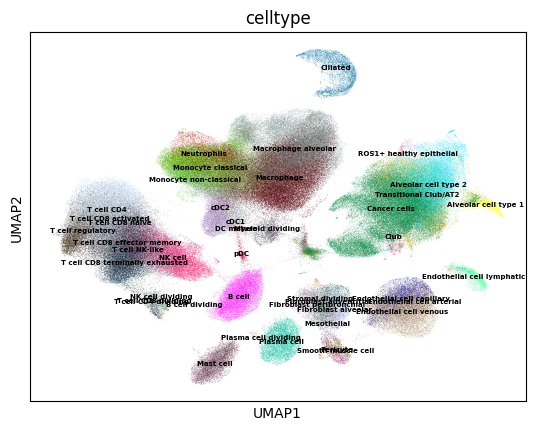

In [ ]:
sc.pl.umap(adata, color=['celltype'],legend_loc="on data",legend_fontsize=5)

In [ ]:
metadata = adata.obs
metadata.to_csv("./Lung_metadata.csv")

In [ ]:
idList = adata.obs['sample_id'].unique()
for id in idList:
    attnTmp = adata.obs[adata.obs['sample_id'] == id]
    avgScore = 1 / len(attnTmp)
    log_attn = np.log2(attnTmp['attention_weight_mean'] / avgScore)
    attn_scaled = (log_attn - np.mean(log_attn)) / np.std(log_attn)
    attn_scaled_clipped = np.clip(attn_scaled, -1, 1)
    adata.obs.loc[adata.obs['sample_id'] == id, 'attn_scaled'] = attn_scaled_clipped

In [ ]:
adata1 = adata[adata.obs['phenotype'] == "normal"]
adata2 = adata[adata.obs['phenotype'] == "lung adenocarcinoma"]
adata3 = adata[adata.obs['phenotype'] == "squamous cell lung carcinoma"]

In [ ]:
sc.settings.verbosity = 1
sc.settings.figdir = './Analysis/Figure/Attn_plot'
sc.settings.set_figure_params(dpi=100, fontsize=10, dpi_save=400,
    facecolor = 'white', figsize=(6,6), format='png')
def one_col_lgd(umap):
    legend = umap.legend(bbox_to_anchor=[1.00, 0.5],
    loc='center left', ncol=1, prop={'size': 6})
    legend.get_frame().set_linewidth(0.0)
    return legend

/home/wuqinhua/anaconda3/envs/phase/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


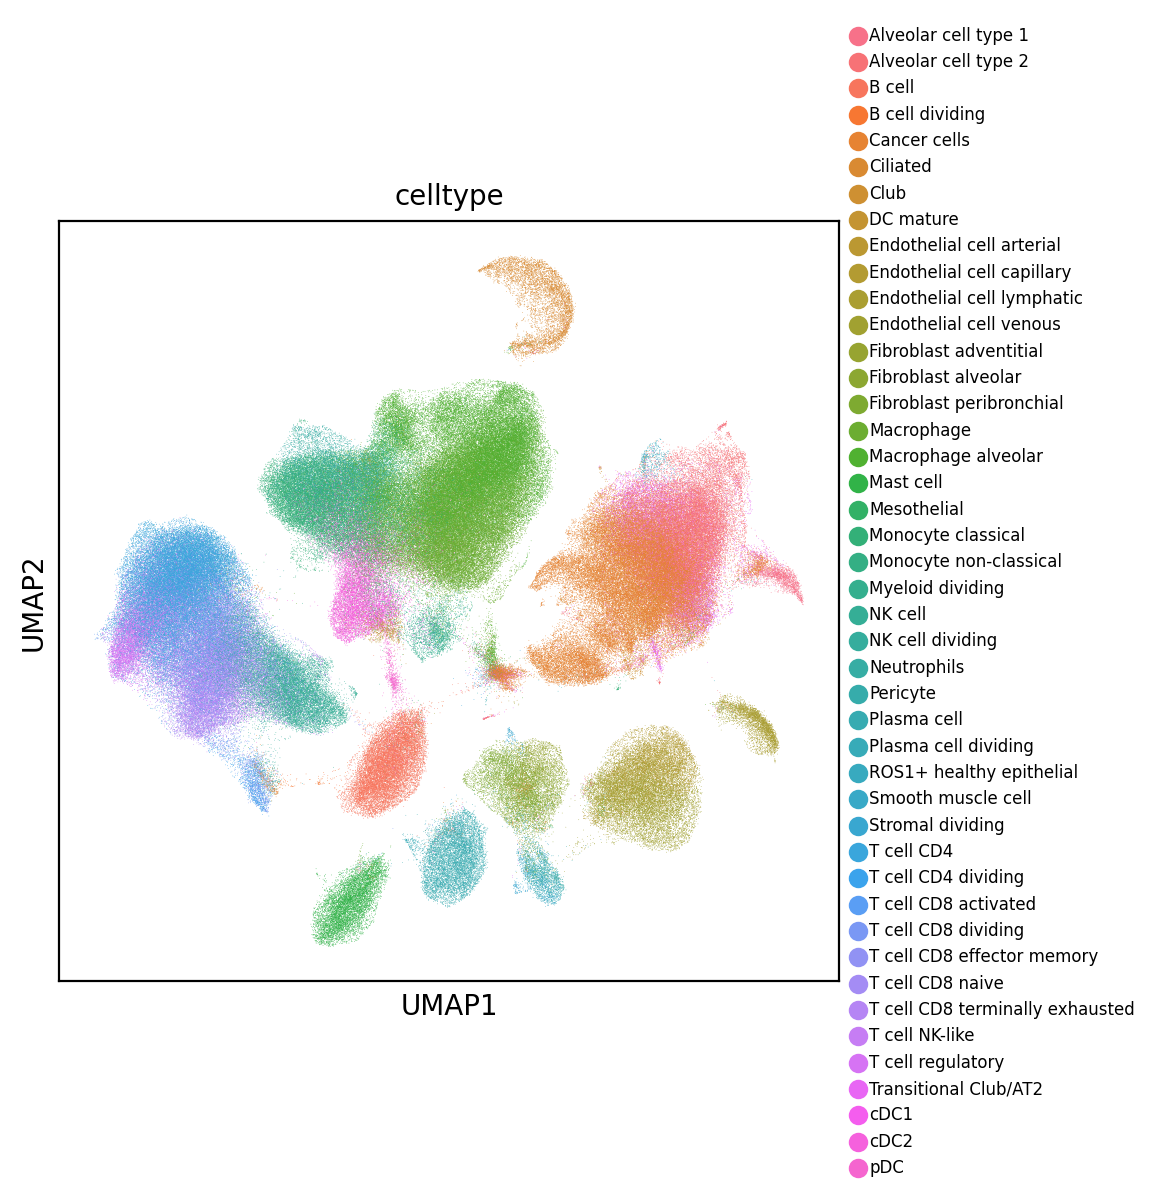

In [ ]:
leiden_umap = sc.pl.umap(adata, color=['celltype'],
    show=False, palette=sns.color_palette("husl",48),
legend_fontsize=6, frameon=True, title='celltype')
lgd = one_col_lgd(leiden_umap)
fig = leiden_umap.get_figure()
fig.set_size_inches(5, 5)
fig.savefig(str(sc.settings.figdir) + '/umap_celltype.pdf', 
            format='pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

In [ ]:
leiden_umap = sc.pl.umap(adata1, color='attn_scaled', show=False, legend_fontsize=6, color_map ='viridis',
                           frameon= True, title='Attention Score of normal',save="_attn_normal.pdf")

In [ ]:
leiden_umap = sc.pl.umap(adata2, color='attn_scaled', show=False, legend_fontsize=6, color_map ='viridis',
                           frameon= True, title='Attention Score of lung adenocarcinoma',save="_attn_lung adenocarcinoma.pdf")

In [ ]:
leiden_umap = sc.pl.umap(adata3, color='attn_scaled', show=False, legend_fontsize=6, color_map ='viridis',
                           frameon= True, title='Attention Score of squamous cell lung carcinoma',save="_attn_squamous cell lung carcinoma.pdf")

# 2. Celltype-level

In [1]:
setwd('/data/wuqinhua/scPhase/Lung')
# rm(list = ls())
# gc()

library(tidyr)
library(ggplot2)
library(forestploter)
library(gridExtra)
library(tidyverse)
library(dplyr)
library(broom)
library(ggpubr)
library(randomForest)
library(mice)
library(reshape2)
library(Metrics)
library(ComplexHeatmap)
library(RColorBrewer)
library(fastcluster)
library(ggbeeswarm)
library(circlize)
library(ggrepel)
library(ggpubr)
library(scales) 
library(ggtext) 

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::combine() masks gridExtra::combine()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:gridExtra’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin



Attaching package: ‘mice’


The following object is masked from ‘package:stats’:

    filter


The following objects are masked from ‘package:bas

### 2.1 Scatter trend plot

In [2]:
attnData = read.csv('./Lung_metadata.csv')
head(attnData)
colnames(attnData)

nameAll = unique(attnData$cell_type_predicted)
nameAll = sort(nameAll)
nameAll

nameList = nameAll

sampleFold = data.frame(id = character(), celltype = character(), fold = numeric())
idList = unique(attnData$sample_id)
for (id in idList) {
  attnTmp = attnData %>% filter(sample_id == id)
  avgScore = 1 / dim(attnTmp)[1]
  foldRes = attnTmp %>% group_by(cell_type_predicted) %>% summarise(res = median(log2(attention_weight_mean/avgScore)))
  dataTmp = data.frame(id = rep(id,dim(foldRes)[1]),
                       celltype = foldRes$cell_type_predicted,
                       fold = foldRes$res)
  dataTmp_s = dataTmp %>% filter(celltype %in% nameList)
  dataTmp_s$fold = scale(dataTmp_s$fold)
  sampleFold = rbind(sampleFold,dataTmp_s)
}

sampleFold.Table = dcast(sampleFold,id ~ celltype)
rownames(sampleFold.Table) = sampleFold.Table$id
sampleFold.Table$id = NULL

sampleInfo = read.csv('./sample_info.csv')
rownames(sampleInfo) = sampleInfo$sample
sampleInfo = sampleInfo[rownames(sampleFold.Table),]
head(sampleFold.Table)

,X,sample_id,uicc_stage,ever_smoker,age,donor_id,origin,dataset,celltype,cell_type_predicted,⋯,cell_type,assay,phenotype,sex,tissue,self_reported_ethnicity,development_stage,observation_joinid,attention_weight_mean,attention_weight_std
,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,001C_AAACCTGCATCGGGTC-0,Adams_Kaminski_2020_001C,non-cancer,no,22,Adams_Kaminski_2020_001C,normal,Adams_Kaminski_2020,Monocyte non-classical,Monocyte,⋯,non-classical monocyte,10x 3' v2,normal,male,lung,unknown,22-year-old stage,re{$hj#%bw,0.0006707097,2.757110e-04
2,001C_AAACCTGTCAACACCA-0,Adams_Kaminski_2020_001C,non-cancer,no,22,Adams_Kaminski_2020_001C,normal,Adams_Kaminski_2020,Macrophage alveolar,Macrophage,⋯,alveolar macrophage,10x 3' v2,normal,male,lung,unknown,22-year-old stage,mr6dH!~~)J,0.0020231914,9.442875e-04
3,001C_AAACGGGAGACTAAGT-0,Adams_Kaminski_2020_001C,non-cancer,no,22,Adams_Kaminski_2020_001C,normal,Adams_Kaminski_2020,Endothelial cell lymphatic,Endothelial cell,⋯,endothelial cell of lymphatic vessel,10x 3' v2,normal,male,lung,unknown,22-year-old stage,CCVy?k_Hpi,0.0001455013,1.328747e-04
4,001C_AAACGGGAGGCTCATT-0,Adams_Kaminski_2020_001C,non-cancer,no,22,Adams_Kaminski_2020_001C,normal,Adams_Kaminski_2020,Macrophage,Macrophage,⋯,macrophage,10x 3' v2,normal,male,lung,unknown,22-year-old stage,dICnrm?v}Y,0.0008137330,1.900178e-04
5,001C_AAACGGGAGGGAACGG-0,Adams_Kaminski_2020_001C,non-cancer,no,22,Adams_Kaminski_2020_001C,normal,Adams_Kaminski_2020,Monocyte classical,Monocyte,⋯,classical monocyte,10x 3' v2,normal,male,lung,unknown,22-year-old stage,5Vz7FxxH^r,0.0001122485,8.579894e-05
6,001C_AAACGGGCAGTAGAGC-0,Adams_Kaminski_2020_001C,non-cancer,no,22,Adams_Kaminski_2020_001C,normal,Adams_Kaminski_2020,Monocyte classical,Monocyte,⋯,classical monocyte,10x 3' v2,normal,male,lung,unknown,22-year-old stage,(&WMegEh0y,0.0003420696,2.082286e-04


[1] "X"                                       
 [2] "sample_id"                               
 [3] "uicc_stage"                              
 [4] "ever_smoker"                             
 [5] "age"                                     
 [6] "donor_id"                                
 [7] "origin"                                  
 [8] "dataset"                                 
 [9] "celltype"                                
[10] "cell_type_predicted"                     
[11] "doublet_status"                          
[12] "leiden"                                  
[13] "n_genes_by_counts"                       
[14] "total_counts"                            
[15] "total_counts_mito"                       
[16] "pct_counts_mito"                         
[17] "ann_coarse"                              
[18] "cell_type_tumor"                         
[19] "tumor_stage"                             
[20] "TP53_mutation"                           
[21] "ALK_mutation"                            
[22] "BRAF_mutation"                           
[23] "ERBB2_mutation"                          
[24] "KRAS_mutation"                           
[25] "ROS_mutation"                            
[26] "origin_fine"                             
[27] "study"                                   
[28] "platform"                                
[29] "cell_type_major"                         
[30] "suspension_type"                         
[31] "assay_ontology_term_id"                  
[32] "cell_type_ontology_term_id"              
[33] "development_stage_ontology_term_id"      
[34] "disease_ontology_term_id"                
[35] "self_reported_ethnicity_ontology_term_id"
[36] "is_primary_data"                         
[37] "sex_ontology_term_id"                    
[38] "tissue_ontology_term_id"                 
[39] "tissue_type"                             
[40] "EGFR_mutation"                           
[41] "cell_type"                               
[42] "assay"                                   
[43] "phenotype"                               
[44] "sex"                                     
[45] "tissue"                                  
[46] "self_reported_ethnicity"                 
[47] "development_stage"                       
[48] "observation_joinid"                      
[49] "attention_weight_mean"                   
[50] "attention_weight_std"

[1] "Alveolar cell type 1"      "B cell"                   
 [3] "cDC"                       "Endothelial cell"         
 [5] "Epithelial cell malignant" "Fibroblast"               
 [7] "Granulocyte"               "Macrophage"               
 [9] "Mast cell"                 "Monocyte"                 
[11] "NK cell"                   "Plasma cell"              
[13] "T cell CD4"                "T cell CD8"

Using fold as value column: use value.var to override.



,Alveolar cell type 1,B cell,cDC,Endothelial cell,Epithelial cell malignant,Fibroblast,Granulocyte,Macrophage,Mast cell,Monocyte,NK cell,Plasma cell,T cell CD4,T cell CD8
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Adams_Kaminski_2020_001C,-0.9807294,-0.6132007,1.0396356,-0.1168643,0.01439786,1.5860895,NA,1.4449830,NA,0.9702498,-0.9384429,-0.8710813,-0.4475338,-1.0875033
Adams_Kaminski_2020_002C,1.9507044,-0.8176040,0.6147917,-0.3289738,0.59393531,NA,NA,0.7344772,-1.2056712,0.8204591,-0.9327578,NA,-0.9691384,-0.4602225
Adams_Kaminski_2020_003C,2.6115551,-0.7361500,0.2200989,-0.3484762,-0.17214536,0.7702045,NA,0.8804866,-0.2960457,0.4150747,-0.9047980,-0.8434047,-0.7447637,-0.8516363
Adams_Kaminski_2020_022C-a,-0.2463725,-0.2242879,0.7236408,-0.1237491,-0.02290953,2.3900347,NA,1.1069932,-0.6148401,0.7148988,-0.8142417,-1.1540041,-0.7613215,-0.9738412
Adams_Kaminski_2020_022C-b,0.1564635,-0.4654737,0.8504011,-0.1162790,0.16112722,1.8232159,NA,1.3577752,-0.4721780,0.9118731,-0.8395320,-1.5553476,-0.8412957,-0.9707500
Adams_Kaminski_2020_034C,0.9736526,-0.6492897,0.5846850,-0.3420000,-0.40199855,1.7856968,NA,0.7097587,NA,0.6647108,-1.3566125,NA,-1.2052003,-0.7634029


,cell_type,kruskal_wallis_p_value,neg_log10_pval
,<chr>,<dbl>,<dbl>
1,Alveolar cell type 1,4.797624e-01,0.3189738
2,B cell,2.067191e-21,20.6846195
3,cDC,7.296337e-04,3.1368951
4,Endothelial cell,3.333197e-09,8.4771390
5,Epithelial cell malignant,1.918177e-32,31.7171114
6,Fibroblast,1.058627e-28,27.9752568


,cell_type,overall_sd
,<chr>,<dbl>
1,Alveolar cell type 1,0.9762705
2,B cell,0.6416200
3,cDC,0.5465306
4,Endothelial cell,0.3507076
5,Epithelial cell malignant,1.1259266
6,Fibroblast,1.4320823


,cell_type,kruskal_wallis_p_value,neg_log10_pval,overall_sd,scaled_pval,scaled_sd,keyness_score,label_text
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Alveolar cell type 1,4.797624e-01,0.3189738,0.9762705,0.00000000,0.5784885,0.00000000,
2,B cell,2.067191e-21,20.6846195,0.6416200,0.64862591,0.2690209,0.17449395,B cell
3,cDC,7.296337e-04,3.1368951,0.5465306,0.08974804,0.1810871,0.01625222,
4,Endothelial cell,3.333197e-09,8.4771390,0.3507076,0.25982959,0.0000000,0.00000000,
5,Epithelial cell malignant,1.918177e-32,31.7171114,1.1259266,1.00000000,0.7168829,0.71688293,Epithelial cell malignant
6,Fibroblast,1.058627e-28,27.9752568,1.4320823,0.88082559,1.0000000,0.88082559,Fibroblast


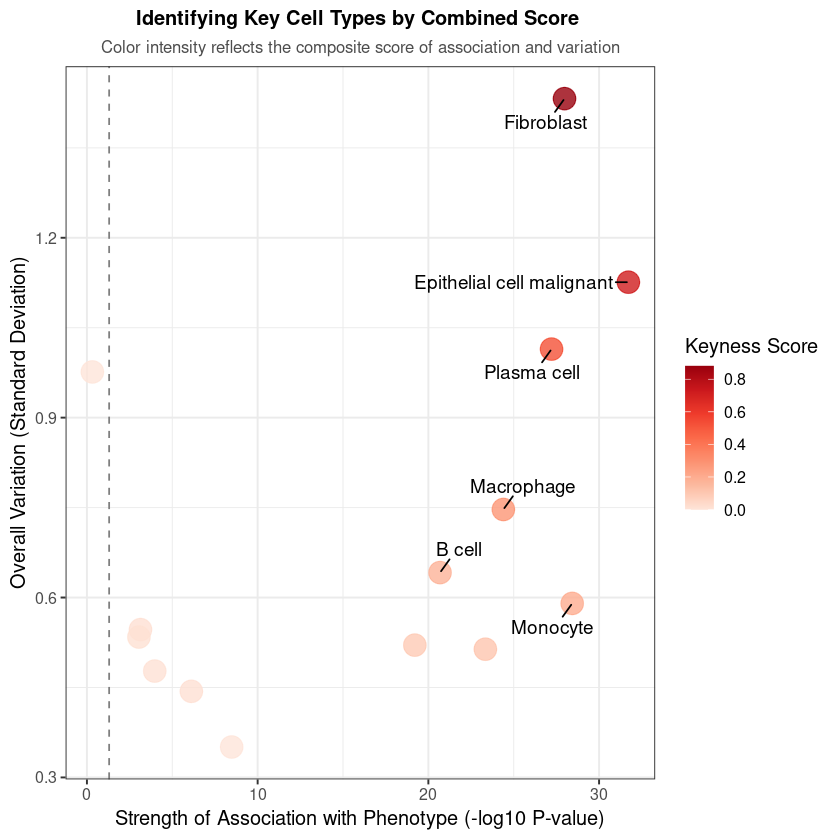

In [3]:
# ===================================================================
# 1. Score 1: Association with categorical phenotypes (Kruskal-Wallis test)
# ===================================================================
sampleInfo$disease <- as.factor(sampleInfo$disease)
sampleInfo <- sampleInfo[rownames(sampleFold.Table), ]
phenotype_association_scores_class <- data.frame(
  cell_type = character(),
  kruskal_wallis_p_value = numeric()
)

for (cell in colnames(sampleFold.Table)) {
  test_data <- data.frame(
    score = sampleFold.Table[[cell]],
    group = sampleInfo$disease
  )

  test_result <- kruskal.test(score ~ group, data = test_data)

  phenotype_association_scores_class <- rbind(
    phenotype_association_scores_class,
    data.frame(
      cell_type = cell,
      kruskal_wallis_p_value = test_result$p.value
    )
  )
}

phenotype_association_scores_class <- phenotype_association_scores_class %>%
  mutate(neg_log10_pval = -log10(kruskal_wallis_p_value))

head(phenotype_association_scores_class)


# ===================================================================
# 2. Score 2: Group Volatility (Standard deviation)
# ===================================================================

overall_variation_scores <- data.frame(
  cell_type = character(),
  overall_sd = numeric()
)

for (cell in colnames(sampleFold.Table)) {
  sd_val <- sd(sampleFold.Table[[cell]], na.rm = TRUE)
  overall_variation_scores <- rbind(
    overall_variation_scores,
    data.frame(
      cell_type = cell,
      overall_sd = sd_val
    )
  )
}
head(overall_variation_scores)


# ===================================================================
# 3. Integrate the scores and create "key scores" for coloring
# ===================================================================

plot_data_combined_score <- merge(
  phenotype_association_scores_class, 
  overall_variation_scores, 
  by = "cell_type"
) %>%
  mutate(
    scaled_pval = rescale(neg_log10_pval, to = c(0, 1)),
    scaled_sd = rescale(overall_sd, to = c(0, 1)),
    keyness_score = scaled_pval * scaled_sd,
    label_text = ifelse(keyness_score > quantile(keyness_score, 0.6, na.rm = TRUE), cell_type, "")
  )

head(plot_data_combined_score)


# ===================================================================
# 4. Plot
# ===================================================================

combined_score_plot <- ggplot(plot_data_combined_score, 
                              aes(x = neg_log10_pval, 
                                  y = overall_sd, 
                                  color = keyness_score, 
                                  label = label_text)) +

  geom_point(size = 6, alpha = 0.8) +
  scale_color_distiller(palette = "Reds", direction = 1, name = "Keyness Score") +
  geom_text_repel(color = "black", size = 4, max.overlaps = Inf,
                  box.padding = 0.6, min.segment.length = 0) +
  geom_vline(xintercept = -log10(0.05), linetype = "dashed", color = "gray50") +
  theme_bw(base_size = 12) +
  labs(
    title = "Identifying Key Cell Types by Combined Score ",
    subtitle = "Color intensity reflects the composite score of association and variation",
    x = "Strength of Association with Phenotype (-log10 P-value)",
    y = "Overall Variation (Standard Deviation)"
  ) +

  theme(
    plot.title = element_text(hjust = 0.5, face = "bold", size = 12),
    plot.subtitle = element_text(hjust = 0.5, size = 10, color = "gray30"),
    legend.position = "right"
  )


ggsave("./Analysis/Figure/Attn_plot/classification_combined_score_plot.pdf", 
       combined_score_plot, 
       width = 6, height = 5, dpi = 300)

print(combined_score_plot)

### 2.2 Violin Plot

In [4]:
nameAll = unique(attnData$celltype)
nameAll = sort(nameAll)
nameAll

nameList = nameAll

sampleFold = data.frame(id = character(), celltype = character(), fold = numeric())
idList = unique(attnData$sample_id)
for (id in idList) {
  attnTmp = attnData %>% filter(sample_id == id)
  avgScore = 1 / dim(attnTmp)[1]
  foldRes = attnTmp %>% group_by(celltype) %>% summarise(res = median(log2(attention_weight_mean/avgScore)))
  dataTmp = data.frame(id = rep(id,dim(foldRes)[1]),
                       celltype = foldRes$celltype,
                       fold = foldRes$res)
  dataTmp_s = dataTmp %>% filter(celltype %in% nameList)
  dataTmp_s$fold = scale(dataTmp_s$fold)
  sampleFold = rbind(sampleFold,dataTmp_s)
}

sampleFold.Table = dcast(sampleFold,id ~ celltype)
rownames(sampleFold.Table) = sampleFold.Table$id
sampleFold.Table$id = NULL

sampleInfo = read.csv('./sample_info.csv')
rownames(sampleInfo) = sampleInfo$sample
sampleInfo = sampleInfo[rownames(sampleFold.Table),]
head(sampleFold.Table)

[1] "Alveolar cell type 1"            "Alveolar cell type 2"           
 [3] "B cell"                          "B cell dividing"                
 [5] "Cancer cells"                    "cDC1"                           
 [7] "cDC2"                            "Ciliated"                       
 [9] "Club"                            "DC mature"                      
[11] "Endothelial cell arterial"       "Endothelial cell capillary"     
[13] "Endothelial cell lymphatic"      "Endothelial cell venous"        
[15] "Fibroblast adventitial"          "Fibroblast alveolar"            
[17] "Fibroblast peribronchial"        "Macrophage"                     
[19] "Macrophage alveolar"             "Mast cell"                      
[21] "Mesothelial"                     "Monocyte classical"             
[23] "Monocyte non-classical"          "Myeloid dividing"               
[25] "Neutrophils"                     "NK cell"                        
[27] "NK cell dividing"                "pDC"                            
[29] "Pericyte"                        "Plasma cell"                    
[31] "Plasma cell dividing"            "ROS1+ healthy epithelial"       
[33] "Smooth muscle cell"              "Stromal dividing"               
[35] "T cell CD4"                      "T cell CD4 dividing"            
[37] "T cell CD8 activated"            "T cell CD8 dividing"            
[39] "T cell CD8 effector memory"      "T cell CD8 naive"               
[41] "T cell CD8 terminally exhausted" "T cell NK-like"                 
[43] "T cell regulatory"               "Transitional Club/AT2"

Using fold as value column: use value.var to override.



,Alveolar cell type 1,Alveolar cell type 2,B cell,B cell dividing,Cancer cells,cDC1,cDC2,Ciliated,Club,DC mature,⋯,T cell CD4,T cell CD4 dividing,T cell CD8 activated,T cell CD8 dividing,T cell CD8 effector memory,T cell CD8 naive,T cell CD8 terminally exhausted,T cell NK-like,T cell regulatory,Transitional Club/AT2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Adams_Kaminski_2020_001C,-1.1759307,0.24860426,-0.9027178,NA,-0.1011581,NA,0.3409798,2.007523,0.46101971,NA,⋯,-0.9837437,-0.1436054,-1.0815445,-0.06207439,-0.7658593,-1.1931096,NA,-1.5756326,-0.4940688,-0.2302293
Adams_Kaminski_2020_002C,NA,0.66851394,-0.8757869,NA,NA,-0.466340694,0.7971473,2.173343,NA,NA,⋯,-0.9471821,NA,NA,-0.26952324,-0.8005834,-1.2212773,NA,NA,-1.1534577,-0.1037115
Adams_Kaminski_2020_003C,-1.4026268,0.17964505,-0.7321100,NA,-1.1681094,-0.002899841,0.6136760,3.384772,0.63000793,0.32256534,⋯,-0.7278917,0.2316371,-0.5027059,-0.24161452,-0.7994791,-0.9887806,-0.9553772,-1.1195229,-0.7284408,-0.3844879
Adams_Kaminski_2020_022C-a,-0.8006701,-0.10013327,-0.4641739,NA,0.6283177,-0.028246695,0.6559363,2.659926,-0.54014110,-0.42841513,⋯,-0.8561300,-0.2469906,-1.0024475,NA,-1.0604193,-0.1982119,-1.2651431,0.3130106,-0.7398602,-0.5403614
Adams_Kaminski_2020_022C-b,-0.4295352,0.03523207,-0.4908040,NA,0.8248069,-0.638153978,0.7253420,2.959299,-0.08083307,-0.08618368,⋯,-0.7551786,-0.3599987,-0.9015793,NA,-0.8782329,-1.2994462,-0.6646237,-1.2235578,-0.9095732,-0.6267072
Adams_Kaminski_2020_034C,NA,-1.19375354,-0.8296371,NA,0.3098217,0.599703057,0.5171135,1.552986,NA,0.31430466,⋯,-1.4658208,NA,NA,NA,-0.8098222,-1.0588007,NA,-0.8676763,NA,0.2399355


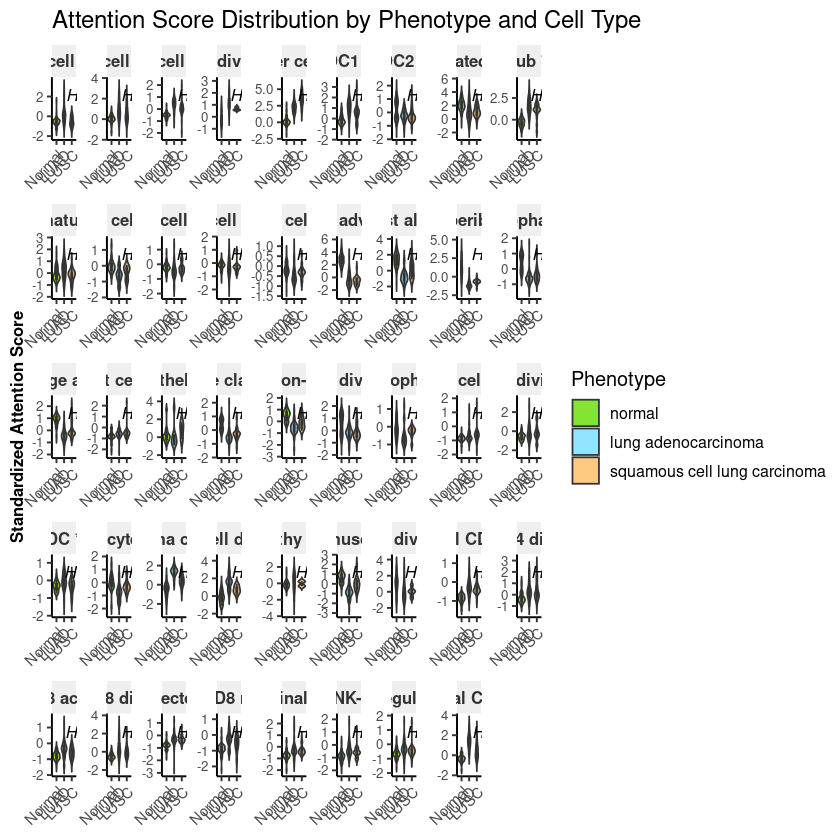

In [8]:
# 假设 sampleFold.Table 和 sampleInfo 已经加载
cell_types_attn <- colnames(sampleFold.Table)
combined_data_atten <- data.frame()
for (cell in cell_types_attn) {
  dataTmp <- data.frame(
    atten = sampleFold.Table[[cell]],
    group = sampleInfo$disease,
    cell_type = cell
  )
  dataTmp_s <- na.omit(dataTmp)
  combined_data_atten <- rbind(combined_data_atten, dataTmp_s)
}

# 定义颜色
custom_colors <- c("normal" = '#66DD00',"lung adenocarcinoma"="#77DDFF","squamous cell lung carcinoma"="#FFBB66")

# 整理绘图数据
plot_df_attn <- combined_data_atten %>%
  dplyr::rename(Attn = atten) %>%
  # 确保 group 列是因子类型，并按自定义顺序排列
  dplyr::mutate(group = factor(group, levels = names(custom_colors))) %>%
  na.omit()


# ===================================================================
# --- 2. 预计算统计值和标签 ---
# ===================================================================
# 这个数据框将包含我们绘图所需的所有标注信息

annotation_data <- plot_df_attn %>%
  group_by(cell_type) %>%
  summarise(
    # a. 执行Kruskal-Wallis检验
    kruskal_test_res = list(kruskal.test(Attn ~ group)),
    # b. 提取p值
    p_value = kruskal_test_res[[1]]$p.value,
    # c. 提取H检验统计值 (之前叫k_statistic)
    h_statistic = kruskal_test_res[[1]]$statistic,
    .groups = 'drop'
  ) %>%
  mutate(
    # d. 根据p值生成显著性星号 (用于标题)
    significance = case_when(
      p_value < 0.001 ~ "***",
      p_value < 0.01  ~ "**",
      p_value < 0.05  ~ "*",
      TRUE ~ "ns"
    ),
    title_with_sig = paste0(cell_type, " ", significance),
    
    # e. 【核心修改】创建包含H值和P值的最终标签字符串
    stat_label = paste0(
        "H = ", round(h_statistic, 2),      # 使用标准的H统计量
        ", ",                               # 分隔符
        scales::pvalue(p_value,             # 使用scales::pvalue格式化p值
                       accuracy = 0.001, 
                       add_p = TRUE)
    )
  )
# 将带星号的标题合并回主绘图数据
plot_df_attn_final <- plot_df_attn %>%
  left_join(annotation_data %>% select(cell_type, title_with_sig), by = "cell_type") %>%
  # 过滤掉没有统计数据的细胞类型 (如果存在)
  filter(!is.na(title_with_sig))


# ===================================================================
# --- 3. 【核心修改】更新绘图代码 ---
# ===================================================================
p_facet_classification_updated <- ggplot(plot_df_attn_final, 
                                         aes(x = group, y = Attn, fill = group)) +
  
  geom_violin(trim = FALSE, alpha = 0.8) +
  geom_boxplot(width = 0.15, fill = "white", alpha = 0.7, outlier.shape = NA) +
  
  geom_text(
    data = annotation_data, 
    aes(label = stat_label), 
    x = -Inf, y = Inf,
    hjust = -0.1, vjust = 2,
    size = 3.5,
    fontface = "italic",
    inherit.aes = FALSE
  ) + 
  
  scale_fill_manual(values = custom_colors, name = "Phenotype") +
  scale_x_discrete(labels = c("normal" = "Normal",
                              "lung adenocarcinoma" = "LUAD",
                              "squamous cell lung carcinoma" = "LUSC")) +
  # 3. 【更新】使用带星号的标题进行分面
  facet_wrap(~title_with_sig, scales = "free",nrow = 5, ncol = 9) +
  
  labs(
    title = "Attention Score Distribution by Phenotype and Cell Type",
    y = "Standardized Attention Score"
  ) +
  
  theme_classic(base_size = 12) +
  theme(
    panel.grid.major.x = element_blank(),
    panel.grid.minor = element_blank(),
    strip.background = element_rect(fill = "#EFEFEF", color = NA),
    strip.text = element_text(size = 10, face = "bold", color = "#333333"),
    axis.text.x = element_text(size = 9, angle = 45, hjust = 1), # 倾斜X轴标签以防重叠
    axis.text.y = element_text(size = 8),
    axis.title = element_text(size = 10, face = "bold"),
    legend.position = "right",
    axis.title.x = element_blank()
  )

# 保存图片
ggsave("./Analysis/Figure/Attn_plot/attn_classification_violin_plot.pdf",
       p_facet_classification_updated, width = 30, height = 18, dpi = 300)

# 显示图片
print(p_facet_classification_updated)